In [ ]:
#Importing Libraries
import pandas as pd
!pip install opendatasets --upgrade --quiet
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Skipping, found downloaded files in "./golden-foot-football-players-image-dataset" (use force=True to force download)
Epoch 1/10
180/180 [==============================] - 207s 1s/step - loss: 0.2018 - accuracy: 0.9478 - val_loss: 0.1752 - val_accuracy: 0.9576
Epoch 2/10
180/180 [==============================] - 197s 1s/step - loss: 0.1732 - accuracy: 0.9527 - val_loss: 0.1607 - val_accuracy: 0.9576
Epoch 3/10
180/180 [==============================] - 200s 1s/step - loss: 0.1582 - accuracy: 0.9534 - val_loss: 0.1569 - val_accuracy: 0.9583
Epoch 4/10
180/180 [==============================] - 208s 1s/step - loss: 0.1249 - accuracy: 0.9602 - val_loss: 0.2199 - val_accuracy: 0.9583
Epoch 5/10
180/180 [==============================] - 195s 1s/step - loss: 0.1001 - accuracy: 0.9675 - val_loss: 0.1608 - val_accuracy: 0.9611
Epoch 6/10
180/180 [==============================] - 199s 1s/step - loss: 0.0676 - accuracy: 0.9777 - val_loss: 0.2092 - val_accuracy: 0.9659
Epoch 7/10
180/180 [====

In [ ]:
# Download the dataset
dataset_url = 'https://www.kaggle.com/datasets/balabaskar/golden-foot-football-players-image-dataset'
od.download(dataset_url)

# Define dataset path
dataset_path = './golden-foot-football-players-image-dataset/football_golden_foot/football_golden_foot'

# Function to load images and labels
def load_images_and_labels(dataset_path):
    images = []
    labels = []
    for player in os.listdir(dataset_path):
        player_folder = os.path.join(dataset_path, player)
        if not os.path.isdir(player_folder):
            continue
        for img_file in os.listdir(player_folder):
            if img_file.endswith('.jpg'):  # Ensure only .jpg files are processed
                img_path = os.path.join(player_folder, img_file)
                img = cv2.imread(img_path)
                if img is None:
                    print(f"Failed to read {img_path}")
                    continue
                img = cv2.resize(img, (128, 128))
                images.append(img)
                if 'messi' in player.lower():
                    labels.append(1)  # Messi is labeled as 1
                else:
                    labels.append(0)  # Not Messi is labeled as 0
    return np.array(images), np.array(labels)

In [ ]:
# Load data
images, labels = load_images_and_labels(dataset_path)

# Normalize images
images = images / 255.0

# Split data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

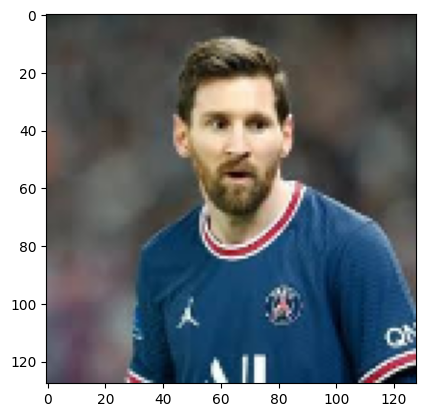

1/1 [==============================] - 0s 135ms/step
GOAT


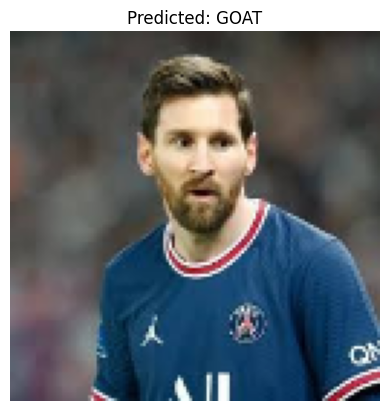

In [ ]:
messi_image_path = os.path.join(dataset_path, 'lionel_messi', '0005ec2377.jpg')  # Update the path as needed
messi_image = cv2.imread(messi_image_path)
if messi_image is None:
    print(f"Failed to read {messi_image_path}")
else:
    messi_image = cv2.resize(messi_image, (128, 128))
    messi_image_normalized = messi_image / 255.0
    plt.imshow(cv2.cvtColor(messi_image, cv2.COLOR_BGR2RGB))
    plt.show()

    # Predict using the model
    prediction = model.predict(np.array([messi_image_normalized]))

    # Print result
    if prediction[0] > 0.5:
        print("GOAT")
    else:
        print("Not GOAT")

# Show the image and prediction result
plt.imshow(cv2.cvtColor(messi_image, cv2.COLOR_BGR2RGB))
plt.title("Predicted: GOAT" if prediction[0] > 0.5 else "Predicted: Not GOAT")
plt.axis('off')
plt.show()


45/45 [==============================] - 13s 295ms/step


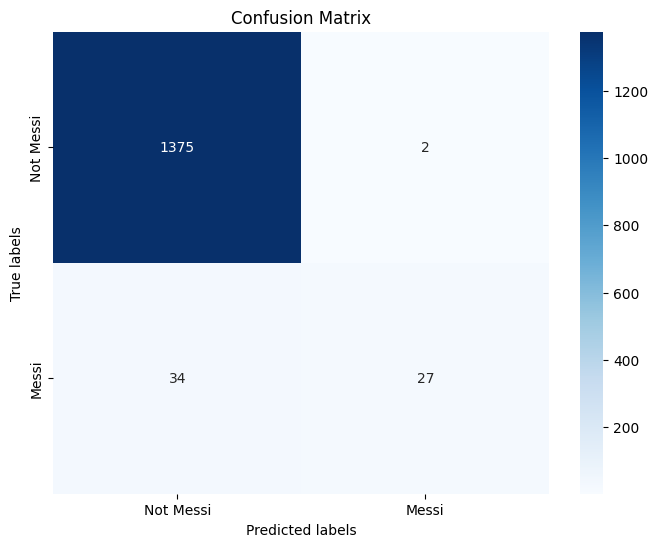

In [ ]:
# Predict on test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Messi', 'Messi'], yticklabels=['Not Messi', 'Messi'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Show Classification Report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1377
           1       0.93      0.44      0.60        61

    accuracy                           0.97      1438
   macro avg       0.95      0.72      0.79      1438
weighted avg       0.97      0.97      0.97      1438

